In [3]:
#Importing necessary libraries and packages
import pandas as pd 
import numpy as np 

import seaborn as sns              # For Visualization 
import matplotlib.pyplot as plt    # ploting package
%matplotlib inline
import matplotlib.ticker as plticker


import warnings                    # Filtering warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel(r"C:\Users\HP\Documents\Internship assignments\spam.xlsx")

print("Shape of the dataset:", df.shape)

Shape of the dataset: (5572, 5)


We can see the dataset has 5572 rows and 5 columns. 

# Exploratory Data Analysis(EDA)

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3634,ham,It's not that you make me cry. It's just that ...,NaN,NaN,NaN
520,ham,But that's on ebay it might be less elsewhere.,NaN,NaN,NaN
3752,ham,Ya that one is slow as poo,NaN,NaN,NaN
3887,ham,ok....take care.umma to you too...,NaN,NaN,NaN
1528,ham,Hey what happen de. Are you alright.,NaN,NaN,NaN


Here we can see there are 5 columns, where v1 indicates ‘spam’ or ‘ham’ referring to v2 which is the actual text or comments collected from various platforms. The last 3 columns are mostly NaN or Null values but we will find more about them in the following steps. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Here we can see that the last 3 columns, viz., ‘Unnamed: 2’, ‘Unnamed:3’ and ‘Unnamed 4’ are mostly null with each having 50, 12 and 6 non-null values only. So, it seems that these fields are unimportant and can be dropped to clean data. 

In [7]:
#Data cleaning 
# dropping last 3 columns as they are mostly null and are of no importance 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

With ‘.drop()’ method we have deleted the unwanted columns. 

In [8]:
# renaming the columns with meaningful names
df.rename(columns={'v1':'Category','v2':'Messages'},inplace=True)
df.sample(5)

,Category,Messages
1868,ham,Today my system sh get ready.all is well and i...
1398,ham,No did you check? I got his detailed message now
5207,ham,"Babe, I'm answering you, can't you see me ? Ma..."
1781,ham,";-( oh well, c u later"
1518,ham,Shall i ask one thing if you dont mistake me.


We have renamed the important columns with more meaningful names. 

In [9]:
#Checking missing values
df.isnull().sum()

Category    0
Messages    0
dtype: int64

We can see the dataset has no missing values. 

In [10]:
#checking for duplicates
df.duplicated().sum()

403

We found 403 duplicate entries which we will remove. 

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
#checking duplicates after removal
df.duplicated().sum()

0

All duplicates have been removed

In [13]:
#checking shape after duplicate removal 
df.shape

(5169, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Messages  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [15]:
df.describe()

,Category,Messages
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


We used the “.describe()” method to get the statistical information of the cleaned data. We can see the cleaned data contains 5169 rows and most messages are 'ham' in nature counting to 4516. 

In [26]:
df.groupby('Category').describe().T

Category              ham        spam
Length count  4515.000000  653.000000
       mean     70.476855  137.891271
       std      56.359585   30.137753
       min       2.000000   13.000000
       25%      34.000000  132.000000
       50%      52.000000  149.000000
       75%      90.000000  157.000000
       max     910.000000  224.000000

Observation: 

-4516 ham messages.

-653 span messages.

In [17]:
df['Length'] = df['Messages'].str.len()
df.head()

,Category,Messages,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0


In [18]:
df['Length'].describe()

count    5168.000000
mean       78.994969
std        58.235445
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: Length, dtype: float64

In [19]:
df[df['Length'] == 910]['Messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

It seems like some romeo is spamming the mail boxes. 

In [20]:
# Count the frequency of top 5 messages.
df['Messages'].value_counts().rename_axis(['Message']).reset_index(name='counts').head()

,Message,counts
0,"Go until jurong point, crazy.. Available only ...",1
1,Wake me up at &lt;#&gt; am morning:),1
2,I will reach ur home in &lt;#&gt; minutes,1
3,Wait.i will come out.. &lt;#&gt; min:),1
4,R u here yet? I'm wearing blue shirt n black p...,1


We also found out the top 5 messages

# Data Visualization

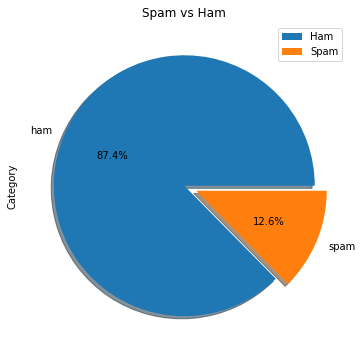

In [21]:
df["Category"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

We can see that 87.4% data is 'ham', that is marked in blue, while 12.6% data is 'spam', that is marked in orange. 

Text(0, 0.5, 'Frequency')

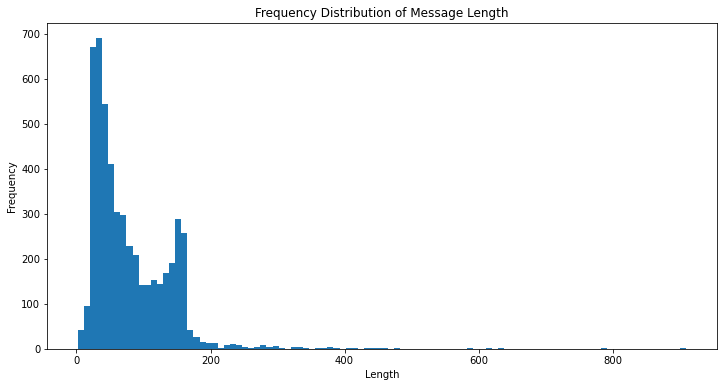

In [22]:
plt.figure(figsize=(12,6))
df['Length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

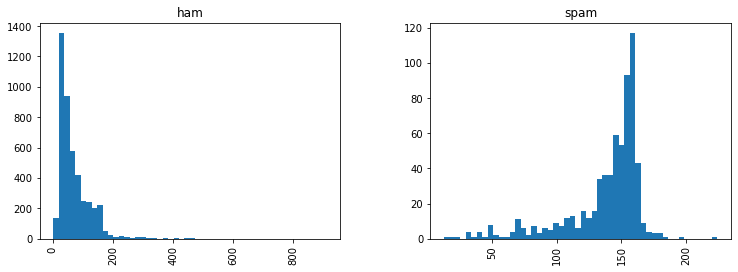

In [23]:
df.hist(column='Length', by='Category', bins=50,figsize=(12,4))

Observation:

  -The first one is a frequency distribution of the message length. Most of the message lenght is less than 200. Note that x-axis goes all the way to 1000ish, this must mean that there is some really long message!
    
  -The second one is a frequency distribution in each category.  Looks like spam messages are usually longer. 

In [24]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
  

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split 
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import re

## Stemming the data
from nltk.stem import PorterStemmer

ps = PorterStemmer()

Messages=df['Messages']

for i in range(0, len(Messages)):

    comment = re.sub('[^a-zA-Z]', ' ', df['Messages'][i])

    comment = comment.lower()

    comment = comment.split()

    

    comment = [ps.stem(word) for word in comment if not word in stopwords.words('english')]

    comment = ' '.join(comment)

    comment.append(comment)

AttributeError: 'str' object has no attribute 'append'

Let us check the number of spam messages.

In [27]:
spam_messages = df[df["Category"] == "spam"]["Messages"]
ham_messages = df[df["Category"] == "ham"]["Messages"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  653
No of ham messages :  4516


In [29]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

Wordcloud for Spam Messages

In [30]:
spam_words = text_preprocess(spam_messages)

In [31]:
# lets print some spam words
spam_words[:10]

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may']

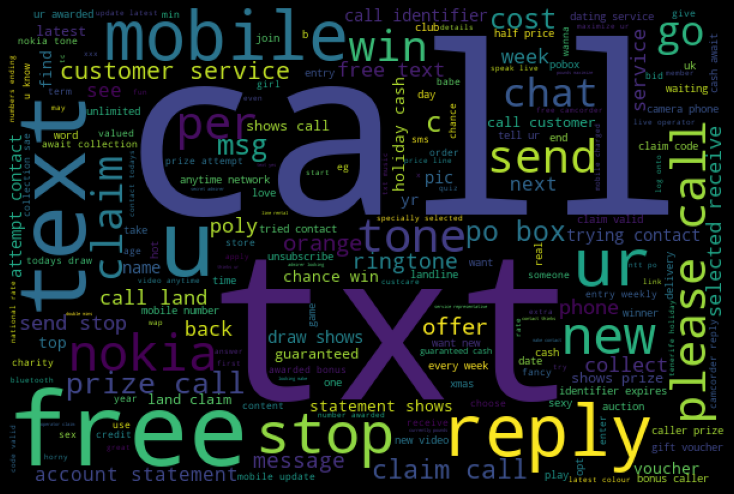

In [32]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Wordcloud for spam messages shows that words like call, txt, win, free, reply, mobile, text etc. are widely used, let's check them statistically.

In [33]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

call      288
free      131
txt       114
ur        105
mobile     94
text       92
reply      90
claim      88
u          82
stop       73
dtype: int64


Wordcloud for Ham Messages

In [35]:
ham_words = text_preprocess(ham_messages)

TypeError: 'in <string>' requires string as left operand, not int